In [36]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("train.csv")
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [38]:
features = [
    'OverallQual',
    'GrLivArea',
    'TotalBsmtSF',
    'BedroomAbvGr',
    'FullBath',
    'Neighborhood'
]

target = 'SalePrice'

data = df[features + [target]]


In [39]:
data.fillna(data.mean(numeric_only=True), inplace=True)
data = pd.get_dummies(data, columns=['Neighborhood'], drop_first=True)

C:\Users\Yash\AppData\Local\Temp\ipykernel_12860\2640961993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean(numeric_only=True), inplace=True)


In [40]:
X = data.drop(target, axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42
)

In [41]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

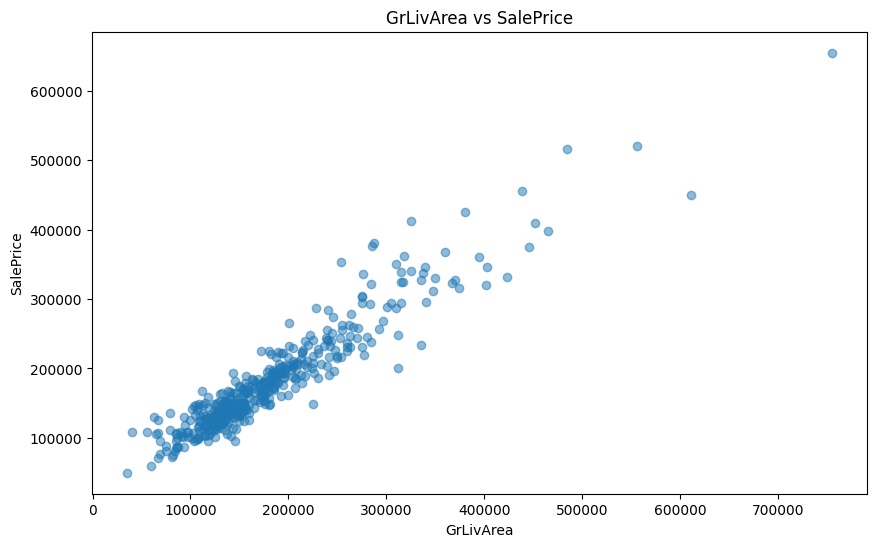

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o', alpha=0.5)
# plt.scatter(data['GrLivArea'], data['SalePrice'], alpha=0.5)
plt.title('GrLivArea vs SalePrice') 
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [43]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 18713.967827128097
RMSE: 27315.90455860494
R² Score: 0.893071278859633


In [44]:
new_house = X.iloc[[50]]  # example house
predicted_price = model.predict(new_house)

print("Predicted House Price:", predicted_price[0])


Predicted House Price: 174606.4
